In [ ]:
import os
import pandas as pd

In [ ]:
data=pd.read_csv('/content/sample_data/Fraud.csv')

In [ ]:
data.head(2)

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,07-May-14,C1787445084,10921.0,30641.0,19720.0,"Rampurhat, India",CASH_OUT,Platinum,Grocery,M,1
1,17-Feb-12,C26852894,8232.0,33189.0,24957.0,"Greater Mumbai, India",CASH_OUT,Platinum,Entertainment,F,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397728 entries, 0 to 397727
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            397728 non-null  object 
 1   nameOrig        397728 non-null  object 
 2   amount          397728 non-null  float64
 3   oldbalanceOrg   397728 non-null  float64
 4   newbalanceOrig  397728 non-null  float64
 5   City            397728 non-null  object 
 6   type            397728 non-null  object 
 7   Card Type       397728 non-null  object 
 8   Exp Type        397728 non-null  object 
 9   Gender          397728 non-null  object 
 10  isFraud         397728 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 33.4+ MB


In [ ]:
data.shape

(397728, 11)

In [ ]:
data.dtypes

Date               object
nameOrig           object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
City               object
type               object
Card Type          object
Exp Type           object
Gender             object
isFraud             int64
dtype: object

In [ ]:
data.nunique()

Date                1326
nameOrig          397691
amount             64311
oldbalanceOrg     100964
newbalanceOrig     88030
City                 986
type                   5
Card Type              6
Exp Type               9
Gender                 2
isFraud                2
dtype: int64

In [ ]:
duplicates = data.duplicated()

print(data[duplicates])


Empty DataFrame
Columns: [Date, nameOrig, amount, oldbalanceOrg, newbalanceOrig, City, type, Card Type, Exp Type, Gender, isFraud]
Index: []


In [ ]:
data.isnull().sum()

Date              0
nameOrig          0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
City              0
type              0
Card Type         0
Exp Type          0
Gender            0
isFraud           0
dtype: int64

In [ ]:
data.describe()

,amount,oldbalanceOrg,newbalanceOrig,isFraud
count,3.977280e+05,3.977280e+05,3.977280e+05,397728.000000
mean,1.661120e+04,3.859438e+04,2.198318e+04,0.221005
std,4.596677e+04,9.510770e+04,6.585956e+04,0.414925
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.100000e+02,1.569000e+03,4.780000e+02,0.000000
50%,6.860000e+03,3.047500e+04,1.214500e+04,0.000000
75%,1.778000e+04,4.366200e+04,2.869000e+04,0.000000
max,2.962080e+06,1.630000e+07,1.376293e+07,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data_df=data
data_df['isFraud'].value_counts()

isFraud
0    309828
1     87900
Name: count, dtype: int64

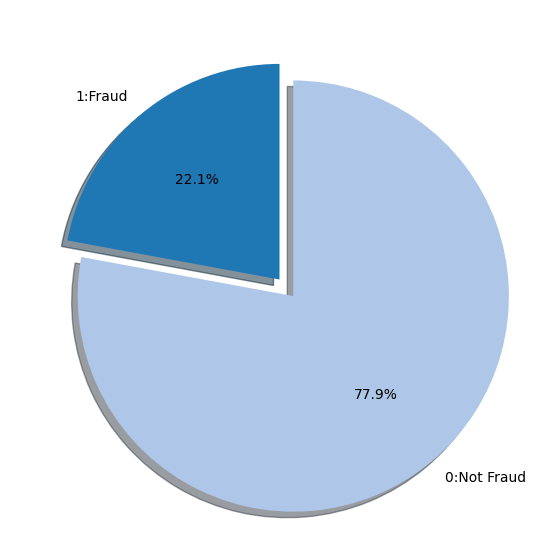

In [ ]:
colors=sns.color_palette("tab20")
labels = '1:Fraud', '0:Not Fraud'
sizes = [data_df.isFraud[data_df['isFraud']==1].count(), data_df.isFraud[data_df['isFraud']==0].count()]
explode = (0, 0.1)
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 10}, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.show()

<ipython-input-45-881e1e1f05b4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='magma')


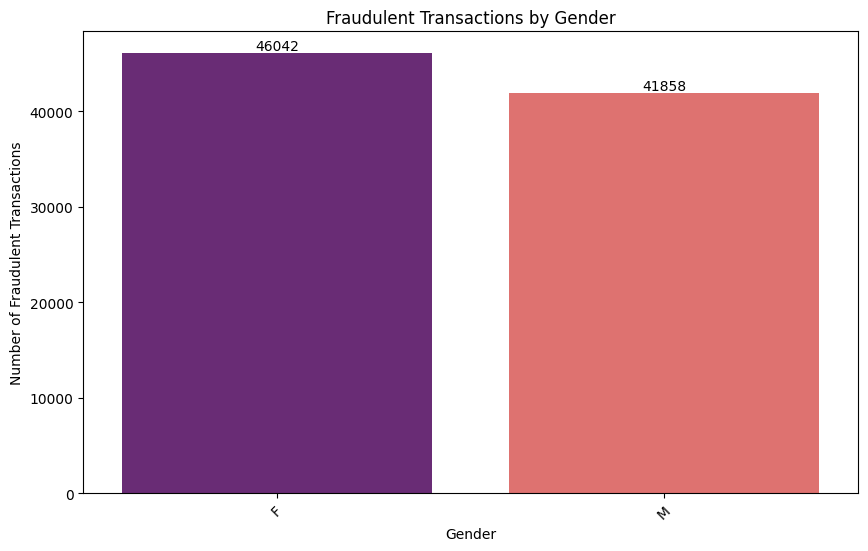

In [ ]:

fraud_data = data[data['isFraud'] == 1]

fraud_counts = fraud_data['Gender'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='magma')
plt.title('Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid(False)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom')

plt.show()


<ipython-input-46-e2807bfbaaba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='magma')


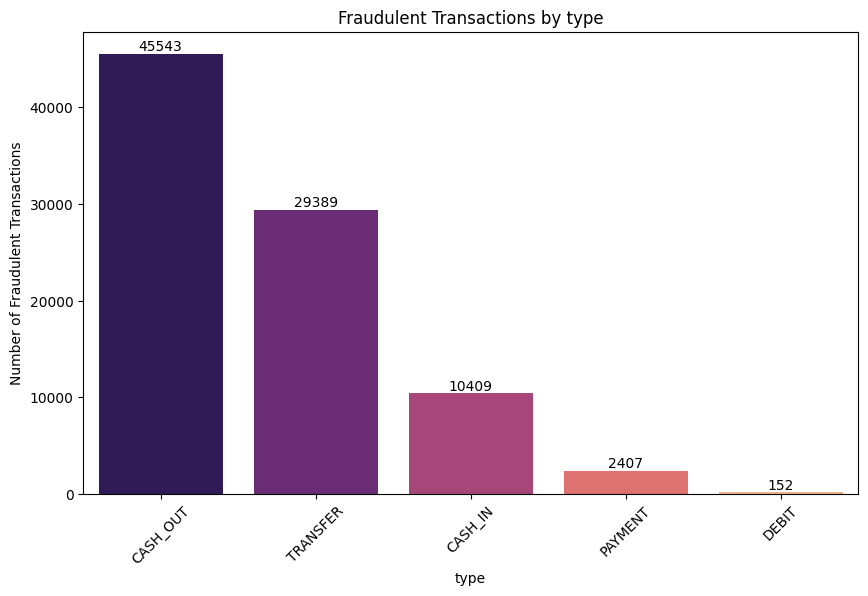

In [ ]:
fraud_counts = fraud_data['type'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='magma')
plt.title('Fraudulent Transactions by type')
plt.xlabel('type')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid(False)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom')

plt.show()


<ipython-input-47-9f7e4465397c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='magma')


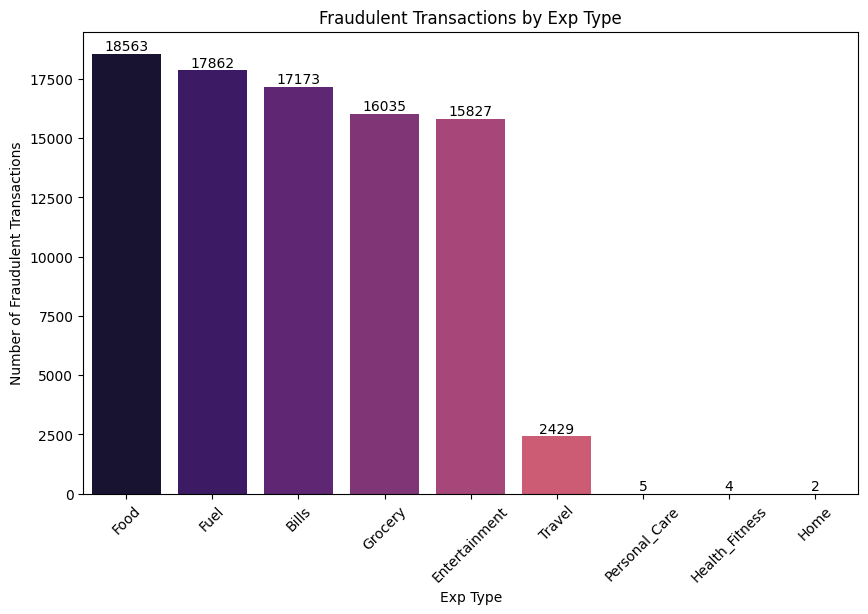

In [ ]:
fraud_counts = fraud_data['Exp Type'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='magma')
plt.title('Fraudulent Transactions by Exp Type')
plt.xlabel('Exp Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.grid(False)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom')

plt.show()


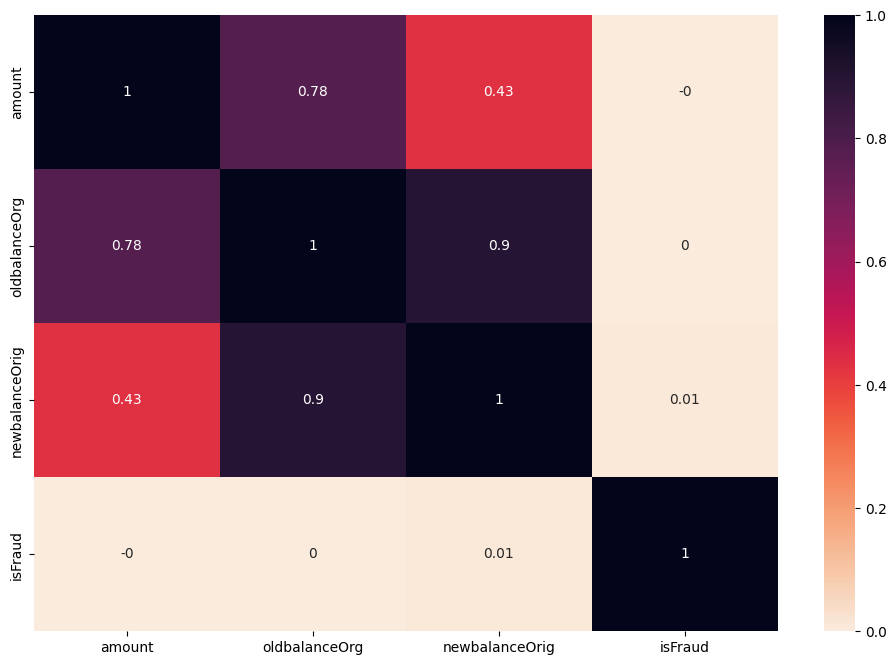

In [ ]:
#corealtion matrix
c_map=sns.color_palette("rocket_r", as_cmap=True)
correlation = data.corr(numeric_only=True).round(2)
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = c_map)
plt.show()

In [ ]:
data = pd.get_dummies(data, columns=['City', 'type', 'Card Type', 'Exp Type', 'Gender'], drop_first=True)



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['amount', 'oldbalanceOrg', 'newbalanceOrig']] = scaler.fit_transform(data[['amount', 'oldbalanceOrg', 'newbalanceOrig']])


In [ ]:
data=data.drop('Date', axis=1)
data=data.drop('nameOrig', axis=1)
data.head(2)

,amount,oldbalanceOrg,newbalanceOrig,isFraud,"City_Adilabad, India","City_Adityapur, India","City_Adoni, India","City_Adoor, India","City_Afzalpur, India","City_Agartala, India",...,Card Type_Silver,Exp Type_Entertainment,Exp Type_Food,Exp Type_Fuel,Exp Type_Grocery,Exp Type_Health_Fitness,Exp Type_Home,Exp Type_Personal_Care,Exp Type_Travel,Gender_M
0,-0.123790,-0.083625,-0.034364,1,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,-0.182288,-0.056834,0.045154,1,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('isFraud', axis=1)
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318182, 1006)
(79546, 1006)
(318182,)
(79546,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_predict


In [ ]:
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, n_jobs=-1)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier(n_jobs=-1)),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("KNN", KNeighborsClassifier(n_jobs=-1))]

In [ ]:
for clf_name, clf in models:
    y_pred = cross_val_predict(clf, X_train, y_train, cv=3)
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Model: {clf_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_train, y_pred))
    print('----------------')


Model: Logistic Regression
Accuracy: 0.7882
              precision    recall  f1-score   support

           0       0.82      0.93      0.87    247824
           1       0.54      0.28      0.37     70358

    accuracy                           0.79    318182
   macro avg       0.68      0.61      0.62    318182
weighted avg       0.76      0.79      0.76    318182

----------------
Model: Decision Tree
Accuracy: 0.7104
              precision    recall  f1-score   support

           0       0.81      0.82      0.81    247824
           1       0.34      0.34      0.34     70358

    accuracy                           0.71    318182
   macro avg       0.58      0.58      0.58    318182
weighted avg       0.71      0.71      0.71    318182

----------------
Model: Random Forest
Accuracy: 0.7843
              precision    recall  f1-score   support

           0       0.82      0.93      0.87    247824
           1       0.52      0.26      0.35     70358

    accuracy                

In [ ]:
#feature importance of the selected model
gbclf =  GradientBoostingClassifier()
gbclf.fit(X_train, y_train)

feature_importances = gbclf.feature_importances_

importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})



In [ ]:
print(importances_df)


                      Feature  Importance
0                      amount    0.326005
1               oldbalanceOrg    0.101232
2              newbalanceOrig    0.007206
3        City_Adilabad, India    0.000000
4       City_Adityapur, India    0.000000
...                       ...         ...
1001  Exp Type_Health_Fitness    0.000000
1002            Exp Type_Home    0.000000
1003   Exp Type_Personal_Care    0.000000
1004          Exp Type_Travel    0.000028
1005                 Gender_M    0.000158

[1006 rows x 2 columns]


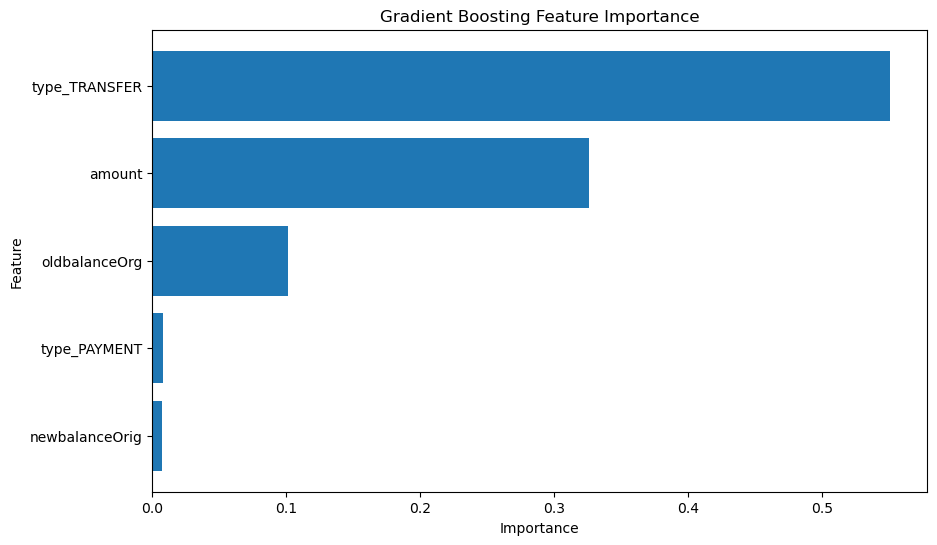

In [ ]:
top_features = importances_df.sort_values(by='Importance', ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have the feature with highest importance at the top
plt.show()


In [ ]:
y_pred = gbclf.predict(X_test)
y_scores = gbclf.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Method to evaluate the performance of the model
def evaluate_model(y_test, y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    print("\n------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot the ROC curve
def plot_roc_(y_test, y_scores):
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='red', label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.88     62004
           1       0.62      0.29      0.40     17542

    accuracy                           0.80     79546
   macro avg       0.72      0.62      0.64     79546
weighted avg       0.78      0.80      0.78     79546


------------------



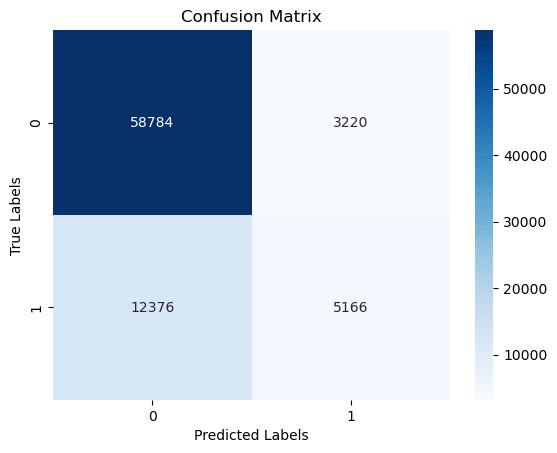

In [ ]:
evaluate_model(y_test,y_pred)

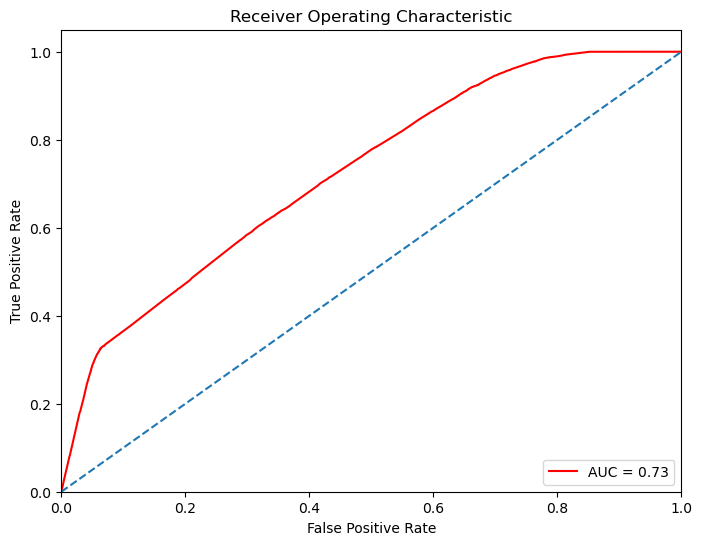

In [ ]:
plot_roc_(y_test, y_scores)

# Feature Engineering

In [ ]:
import datetime as dt
import pandas as pd

data2=pd.read_csv('/content/sample_data/Fraud.csv')


# Convert 'Date' to datetime format
data2['Date'] = pd.to_datetime(data2['Date'], format='%d-%b-%y')


# Feature Engineering
# Day of the Week
data2['DayOfWeek'] = data2['Date'].dt.day_name()

# Transaction Size Category
bins = [0, 10000, 50000, float('inf')]
labels = ['Small', 'Medium', 'Large']
data2['TransSizeCategory'] = pd.cut(data2['amount'], bins=bins, labels=labels)

# Change in Balance
data2['BalanceChange'] = data2['oldbalanceOrg'] - data2['newbalanceOrig']

# Drop the columns are they are highly correalted

data2 = data2.drop('oldbalanceOrg', axis=1)
data2 = data2.drop('newbalanceOrig', axis=1)


# Display the modified dataframe
data2.head(), data2.columns


(        Date     nameOrig   amount                   City      type  \
 0 2014-05-07  C1787445084  10921.0       Rampurhat, India  CASH_OUT   
 1 2012-02-17    C26852894   8232.0  Greater Mumbai, India  CASH_OUT   
 2 2011-11-09  C1356165627  13043.0         Kolkata, India  CASH_OUT   
 3 2012-08-03   C278970478  12524.0          Kanpur, India  CASH_OUT   
 4 2012-02-06   C688216081  17651.0        Nainital, India  CASH_OUT   
 
    Card Type       Exp Type Gender  isFraud  DayOfWeek TransSizeCategory  \
 0   Platinum        Grocery      M        1  Wednesday            Medium   
 1   Platinum  Entertainment      F        1     Friday             Small   
 2  Signature        Grocery      F        1  Wednesday            Medium   
 3   Platinum          Bills      F        1     Friday            Medium   
 4     Silver  Entertainment      M        1     Monday            Medium   
 
    BalanceChange  
 0        10921.0  
 1         8232.0  
 2        13043.0  
 3        12524.0  
 4

<ipython-input-13-87d2ccb92fe9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_weekday_counts.index, y=fraud_weekday_counts.values, palette='viridis')


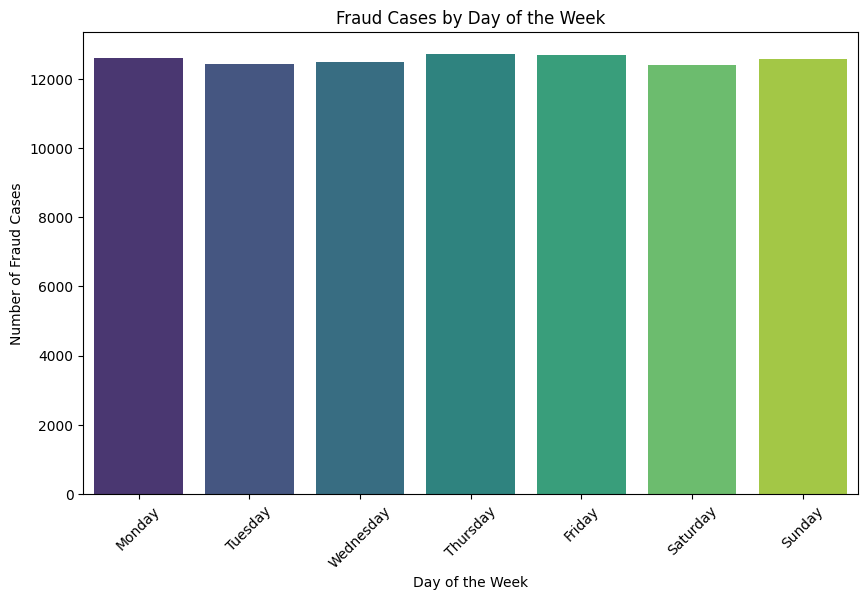

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for fraud cases
fraud_cases = data2[data2['isFraud'] == 1]

# Count the number of fraud cases per day of the week
fraud_weekday_counts = fraud_cases['DayOfWeek'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_weekday_counts.index, y=fraud_weekday_counts.values, palette='viridis')
plt.title('Fraud Cases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data2 = pd.get_dummies(data2, columns=['City', 'type', 'Card Type', 'Exp Type', 'Gender','DayOfWeek'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data2[['amount','BalanceChange']] = scaler.fit_transform(data2[['amount','BalanceChange']])


In [ ]:
data2 = pd.get_dummies(data2, columns=['TransSizeCategory'], drop_first=True)


In [ ]:
data2 = data2.drop('Date', axis=1)
data2 = data2.drop('nameOrig', axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X = data2.drop('isFraud', axis=1)
y = data2['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318182, 1013)
(79546, 1013)
(318182,)
(79546,)


In [ ]:
models = [
    ("Gradient Boosting", GradientBoostingClassifier())]

In [ ]:
for clf_name, clf in models:
    y_pred = cross_val_predict(clf, X_train, y_train, cv=3)
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Model: {clf_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_train, y_pred))
    print('----------------')


Model: Gradient Boosting
Accuracy: 0.8015
              precision    recall  f1-score   support

           0       0.82      0.95      0.88    247824
           1       0.61      0.29      0.40     70358

    accuracy                           0.80    318182
   macro avg       0.72      0.62      0.64    318182
weighted avg       0.78      0.80      0.77    318182

----------------


In [ ]:
#feature importance of the selected model
gbclf =  GradientBoostingClassifier()
gbclf.fit(X_train, y_train)

feature_importances = gbclf.feature_importances_

importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})



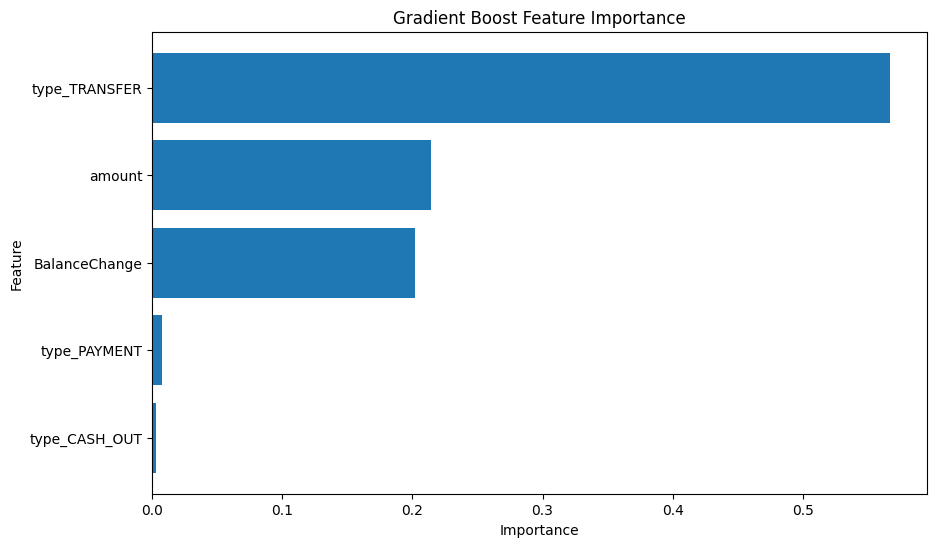

In [ ]:
import matplotlib.pyplot as plt

top_features = importances_df.sort_values(by='Importance', ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boost Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have the feature with highest importance at the top
plt.show()


In [ ]:
y_pred = gbclf.predict(X_test)
y_scores =gbclf.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Method to evaluate the performance of the model
def evaluate_model(y_test, y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    print("\n------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot the ROC curve
def plot_roc_(y_test, y_scores):
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='red', label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     62004
           1       0.61      0.31      0.41     17542

    accuracy                           0.80     79546
   macro avg       0.72      0.62      0.64     79546
weighted avg       0.78      0.80      0.78     79546

Accuracy: 0.8015

------------------



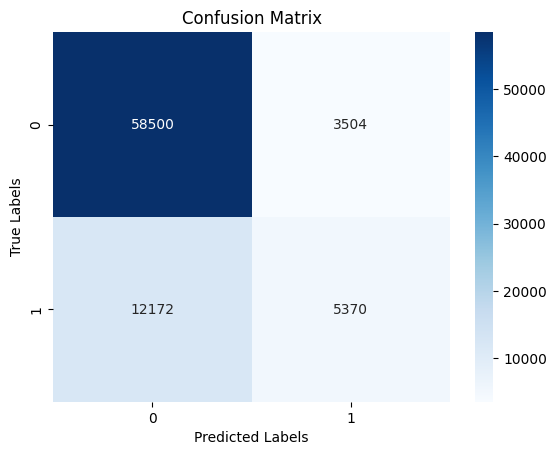

In [ ]:
evaluate_model(y_test, y_pred)

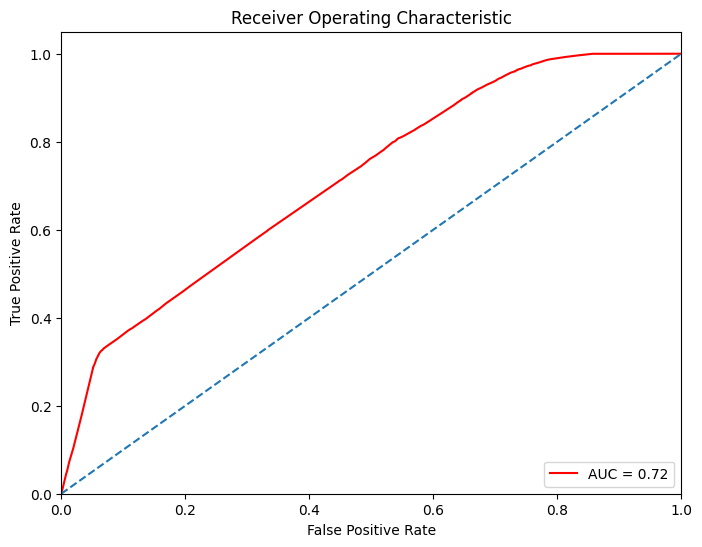

In [ ]:
plot_roc_(y_test, y_scores)

#Removing City

In [ ]:
import datetime as dt
import pandas as pd

data2=pd.read_csv('/content/sample_data/Fraud.csv')


# Convert 'Date' to datetime format
data2['Date'] = pd.to_datetime(data2['Date'], format='%d-%b-%y')


# Feature Engineering
# Day of the Week
data2['DayOfWeek'] = data2['Date'].dt.day_name()

# Transaction Size Category
bins = [0, 10000, 50000, float('inf')]
labels = ['Small', 'Medium', 'Large']
data2['TransSizeCategory'] = pd.cut(data2['amount'], bins=bins, labels=labels)

# Change in Balance
data2['BalanceChange'] = data2['oldbalanceOrg'] - data2['newbalanceOrig']

# Drop the columns are they are highly correalted

data2 = data2.drop('oldbalanceOrg', axis=1)
data2 = data2.drop('newbalanceOrig', axis=1)


# Display the modified dataframe
data2.head(), data2.columns


(        Date     nameOrig   amount                   City      type  \
 0 2014-05-07  C1787445084  10921.0       Rampurhat, India  CASH_OUT   
 1 2012-02-17    C26852894   8232.0  Greater Mumbai, India  CASH_OUT   
 2 2011-11-09  C1356165627  13043.0         Kolkata, India  CASH_OUT   
 3 2012-08-03   C278970478  12524.0          Kanpur, India  CASH_OUT   
 4 2012-02-06   C688216081  17651.0        Nainital, India  CASH_OUT   
 
    Card Type       Exp Type Gender  isFraud  DayOfWeek TransSizeCategory  \
 0   Platinum        Grocery      M        1  Wednesday            Medium   
 1   Platinum  Entertainment      F        1     Friday             Small   
 2  Signature        Grocery      F        1  Wednesday            Medium   
 3   Platinum          Bills      F        1     Friday            Medium   
 4     Silver  Entertainment      M        1     Monday            Medium   
 
    BalanceChange  
 0        10921.0  
 1         8232.0  
 2        13043.0  
 3        12524.0  
 4

In [ ]:
data2 = pd.get_dummies(data2, columns=['type', 'Card Type', 'Exp Type', 'Gender','DayOfWeek'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data2[['amount','BalanceChange']] = scaler.fit_transform(data2[['amount', 'BalanceChange']])


In [ ]:
data2 = pd.get_dummies(data2, columns=['TransSizeCategory'], drop_first=True)


In [ ]:
data2 = data2.drop('Date', axis=1)
data2 = data2.drop('nameOrig', axis=1)
data2 = data2.drop('City', axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X1 = data2.drop('isFraud', axis=1)
y1 = data2['isFraud']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [ ]:
models = [
    ("Gradient Boosting", GradientBoostingClassifier())]

In [ ]:
for clf_name, clf in models:
    y1_pred = cross_val_predict(clf, X1_train, y1_train, cv=3)
    accuracy = accuracy_score(y1_train, y1_pred)
    print(f'Model: {clf_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y1_train, y1_pred))
    print('----------------')


Model: Gradient Boosting
Accuracy: 0.8015
              precision    recall  f1-score   support

           0       0.83      0.94      0.88    247824
           1       0.60      0.30      0.40     70358

    accuracy                           0.80    318182
   macro avg       0.71      0.62      0.64    318182
weighted avg       0.78      0.80      0.77    318182

----------------


In [ ]:
#feature importance of the selected model
gbclf =  GradientBoostingClassifier()
gbclf.fit(X1_train, y1_train)

feature_importances = gbclf.feature_importances_

importances_df = pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importances})


y1_pred = gbclf.predict(X1_test)
y1_scores =gbclf.predict_proba(X1_test)[:, 1]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Method to evaluate the performance of the model
def evaluate_model(y1_test, y1_pred):
    print("Classification Report")
    print(classification_report(y1_test, y1_pred))
    print("\n------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y1_test, y1_pred)

    # Plotting the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot the ROC curve
def plot_roc_(y1_test, y1_scores):
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y1_test, y1_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='red', label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     62004
           1       0.61      0.30      0.41     17542

    accuracy                           0.80     79546
   macro avg       0.72      0.62      0.64     79546
weighted avg       0.78      0.80      0.78     79546


------------------



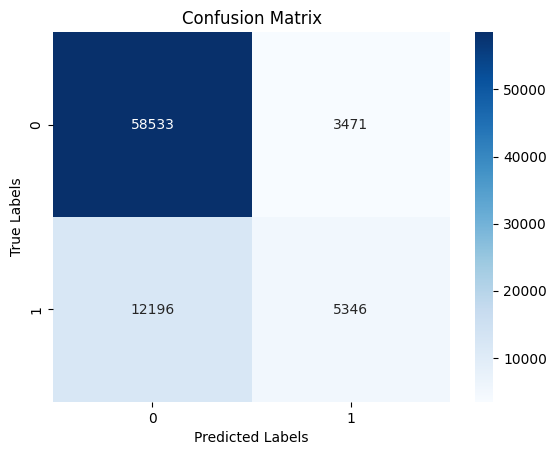

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

evaluate_model(y1_test, y1_pred)


There is no much improvement

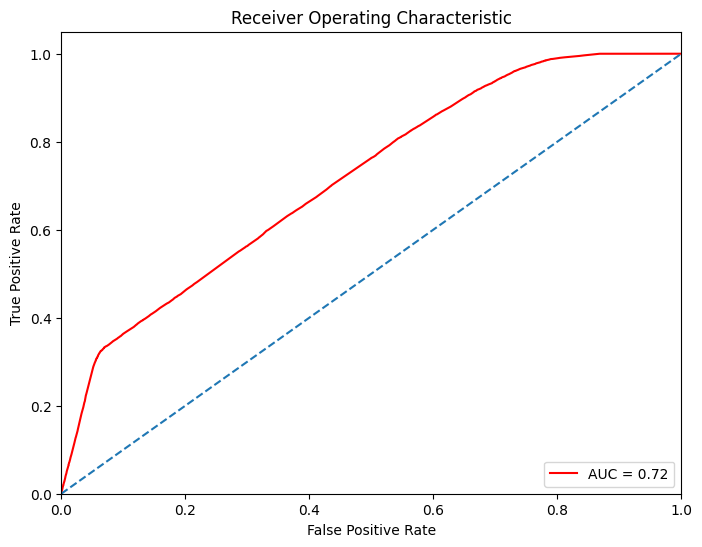

In [ ]:
plot_roc_(y1_test, y1_scores)

#OVER SAMPLING

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
import numpy as np
smote = SMOTE(random_state=42)

X_sm, y_sm = smote.fit_resample(X, y)
print("Oversampling successful.")


In [ ]:
#Train Test Split after using SMOTE technquie
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(336000, 20)
(84000, 20)
(336000,)
(84000,)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "Gradient Boosting": GradientBoostingClassifier()
}

def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        # Predictions on test set
        y_pred_test = model.predict(X_test)
        # Predictions on train set
        y_pred_train = model.predict(X_train)

        # Calculate accuracy on test and train sets
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy_train = accuracy_score(y_train, y_pred_train)

        # Generate classification reports for test and train sets
        report_test = classification_report(y_test, y_pred_test)
        report_train = classification_report(y_train, y_pred_train)

        # Store results separately
        results[name] = {
            'test_accuracy': accuracy_test,
            'train_accuracy': accuracy_train,
            'test_report': report_test,
            'train_report': report_train
        }
    return results

model_results = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Output the results
for model_name, results in model_results.items():
    print(f"{model_name} Training Accuracy: {results['train_accuracy']}")
    print(f"Training Classification Report:\n{results['train_report']}\n")
    print(f"{model_name} Testing Accuracy: {results['test_accuracy']}")
    print(f"Testing Classification Report:\n{results['test_report']}\n")



Gradient Boosting Training Accuracy: 0.9999859469638416
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70371
           1       1.00      1.00      1.00     71947

    accuracy                           1.00    142318
   macro avg       1.00      1.00      1.00    142318
weighted avg       1.00      1.00      1.00    142318


Gradient Boosting Testing Accuracy: 0.9996627318718381
Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17527
           1       1.00      1.00      1.00     18053

    accuracy                           1.00     35580
   macro avg       1.00      1.00      1.00     35580
weighted avg       1.00      1.00      1.00     35580




We are sticking with the featured enginnered model1 as the sampling technique leads to overfitting

> Add blockquote





hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'max_depth': [3, 4],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

#20 % of the dataset used due to memory issues
X_train=X_train.head(67200)
y_train=y_train.head(67200)
X_test=X_test.head(16800)
y_test=y_test.head(16800)

model = GradientBoostingClassifier()

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print Best Parameter
print("Best Parameters: ", grid_search.best_params_)
# Print Best Cross Validation Score
print("Best Cross-Validation Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print('Training')
# Evaluate best model training
accuracy_train = best_model.score(X_train, y_train)
print("Accuracy on Training Data: ", accuracy_train)
print(classification_report(y_train, y_train_pred))

print('')
print('Testing')
# Evaluate best model testing
accuracy_test = best_model.score(X_test, y_test)
print("Accuracy on Test Data: ", accuracy_test)
print(classification_report(y_test, y_test_pred))


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Cross-Validation Score:  0.8013690476190476
Training
Accuracy on Training Data:  0.8029315476190476
              precision    recall  f1-score   support

           0       0.83      0.95      0.88     52385
           1       0.61      0.30      0.40     14815

    accuracy                           0.80     67200
   macro avg       0.72      0.62      0.64     67200
weighted avg       0.78      0.80      0.78     67200


Testing
Accuracy on Test Data:  0.7995238095238095
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     13038
           1       0.61      0.29      0.39      3762

    accuracy                           0.80     16800
   macro avg       0.72      0.62      0.64     16800
weighted avg       0.77      0.80      0.77     16800

